#TripAdvisor

The data set you are given is populated by crawling TripAdvisor.com. Reviews on destinations in 10 categories are considered. Each traveler rating is mapped as Excellent (4), Very Good (3), Average (2), Poor (1), and Terrible (0) and average rating is used against each category per user.

* Attribute 1 : Unique user id
* Attribute 2 : Average user feedback on art galleries
* Attribute 3 : Average user feedback on dance clubs
* Attribute 4 : Average user feedback on juice bars
* Attribute 5 : Average user feedback on restaurants
* Attribute 6 : Average user feedback on museums
* Attribute 7 : Average user feedback on resorts
* Attribute 8 : Average user feedback on parks/picnic spots
* Attribute 9 : Average user feedback on beaches
* Attribute 10 : Average user feedback on theaters
* Attribute 11 : Average user feedback on religious institutions

Your task is to cluster the users based on the ratings they have left on Trip Advisor. 

At the bottom of your code, you need to create a recommendation function that will take 2 User IDs (e.g. recommend("User 1", "User 2")) as input and will return "Yes" or "No" to the question on whether we can recommend the destinations User 2 likes to User 1. (Hint: if they are in the same cluster, your function should return "Yes") Run your function to show answers to the following questions:

- For User 8, is it better to suggest the destinations User 28 likes or the destinations User 29 likes?
- For User 11, is it better to suggest the destinations User 16 likes or the destinations User 28 likes?

For both questions, please explain your answer in detail.

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get the Data

In [2]:
df = pd.read_csv('tripadvisor_review.csv')

# Exploratory Data Analysis

In [3]:
df.head()

User ID  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1        0.93         1.8        2.29        0.62        0.80   
1  User 2        1.02         2.2        2.66        0.64        1.42   
2  User 3        1.22         0.8        0.54        0.53        0.24   
3  User 4        0.45         1.8        0.29        0.57        0.46   
4  User 5        0.51         1.2        1.18        0.57        1.54   

   Category 6  Category 7  Category 8  Category 9  Category 10  
0        2.42        3.19        2.79        1.82         2.42  
1        3.18        3.21        2.63        1.86         2.32  
2        1.54        3.18        2.80        1.31         2.50  
3        1.52        3.18        2.96        1.57         2.86  
4        2.02        3.18        2.78        1.18         2.54

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [5]:
df.describe().T

count      mean       std   min   25%   50%     75%   max
Category 1   980.0  0.893194  0.326912  0.34  0.67  0.83  1.0200  3.22
Category 2   980.0  1.352612  0.478280  0.00  1.08  1.28  1.5600  3.64
Category 3   980.0  1.013306  0.788607  0.13  0.27  0.82  1.5725  3.62
Category 4   980.0  0.532500  0.279731  0.15  0.41  0.50  0.5800  3.44
Category 5   980.0  0.939735  0.437430  0.06  0.64  0.90  1.2000  3.30
Category 6   980.0  1.842898  0.539538  0.14  1.46  1.80  2.2000  3.76
Category 7   980.0  3.180939  0.007824  3.16  3.18  3.18  3.1800  3.21
Category 8   980.0  2.835061  0.137505  2.42  2.74  2.82  2.9100  3.39
Category 9   980.0  1.569439  0.364629  0.74  1.31  1.54  1.7600  3.17
Category 10  980.0  2.799224  0.321380  2.14  2.54  2.78  3.0400  3.66

Category 7 (feedback on resorts) has the least std among other features ... 

Category 3 (feedback on dance clubs) has the highest std among other features ... 

interesting

<Axes: >

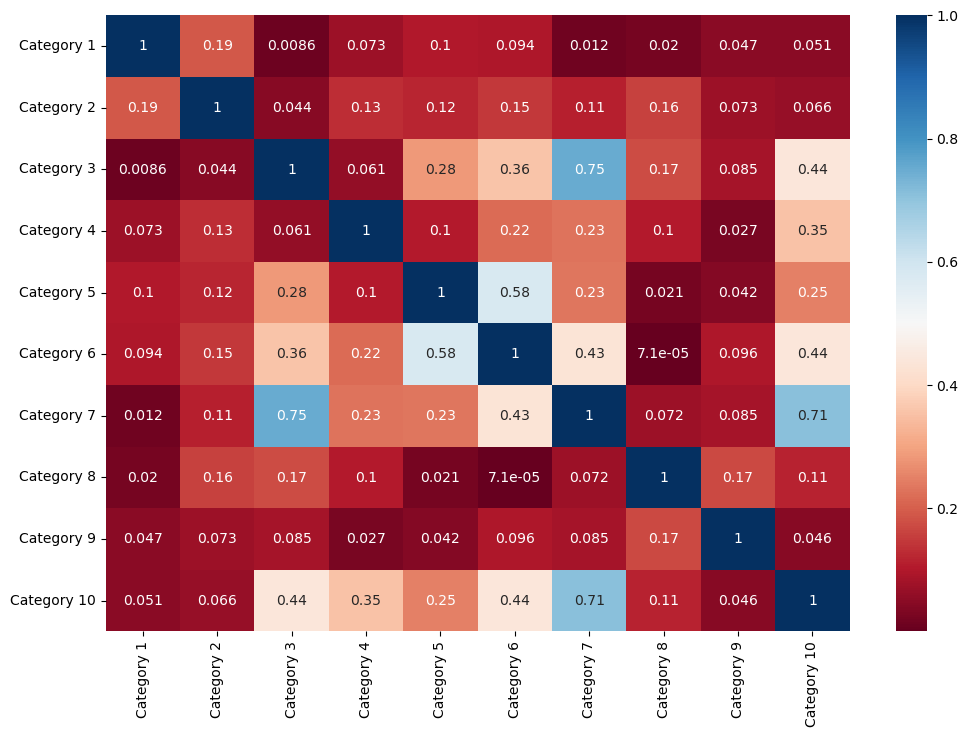

In [6]:
# Check the correlation between each pair of numberic fetures
corr = df.corr(numeric_only=True)

# I used absolute values to show both positive and negative correlations with same color
fig = plt.figure(figsize=(12, 8))
sns.heatmap(np.abs(corr), annot = True, cmap="RdBu")
#sns.heatmap(corr, annot = True, cmap="RdBu")

Two features with the least and the highest std are correlated

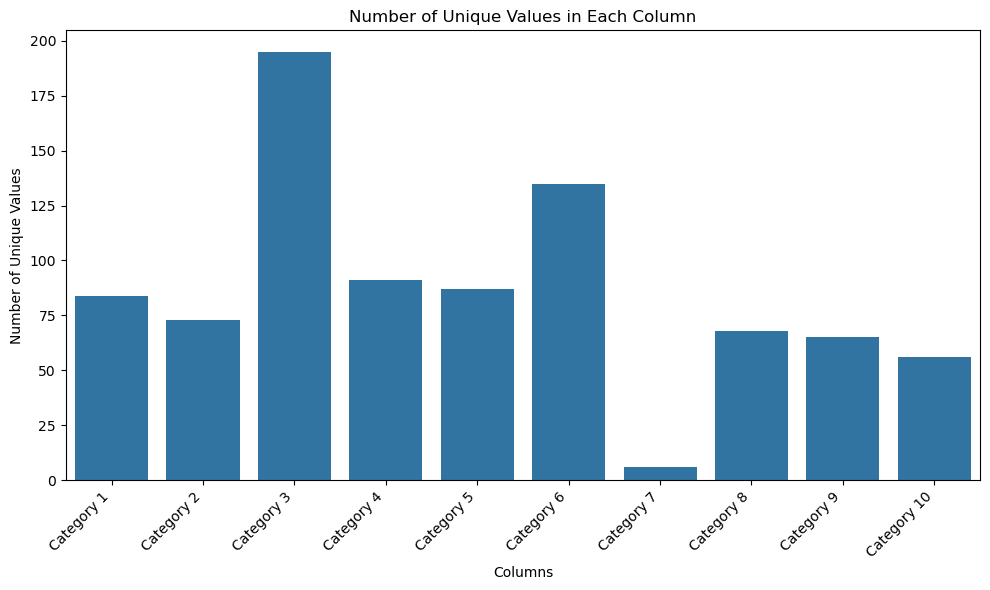

In [7]:
unique_counts = df.drop('User ID', axis = 1).nunique()

plt.figure(figsize=(10, 6))
sns.barplot(x=unique_counts.index, y=unique_counts.values)
plt.xticks(rotation=45, ha='right') 
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.tight_layout()  
plt.show()


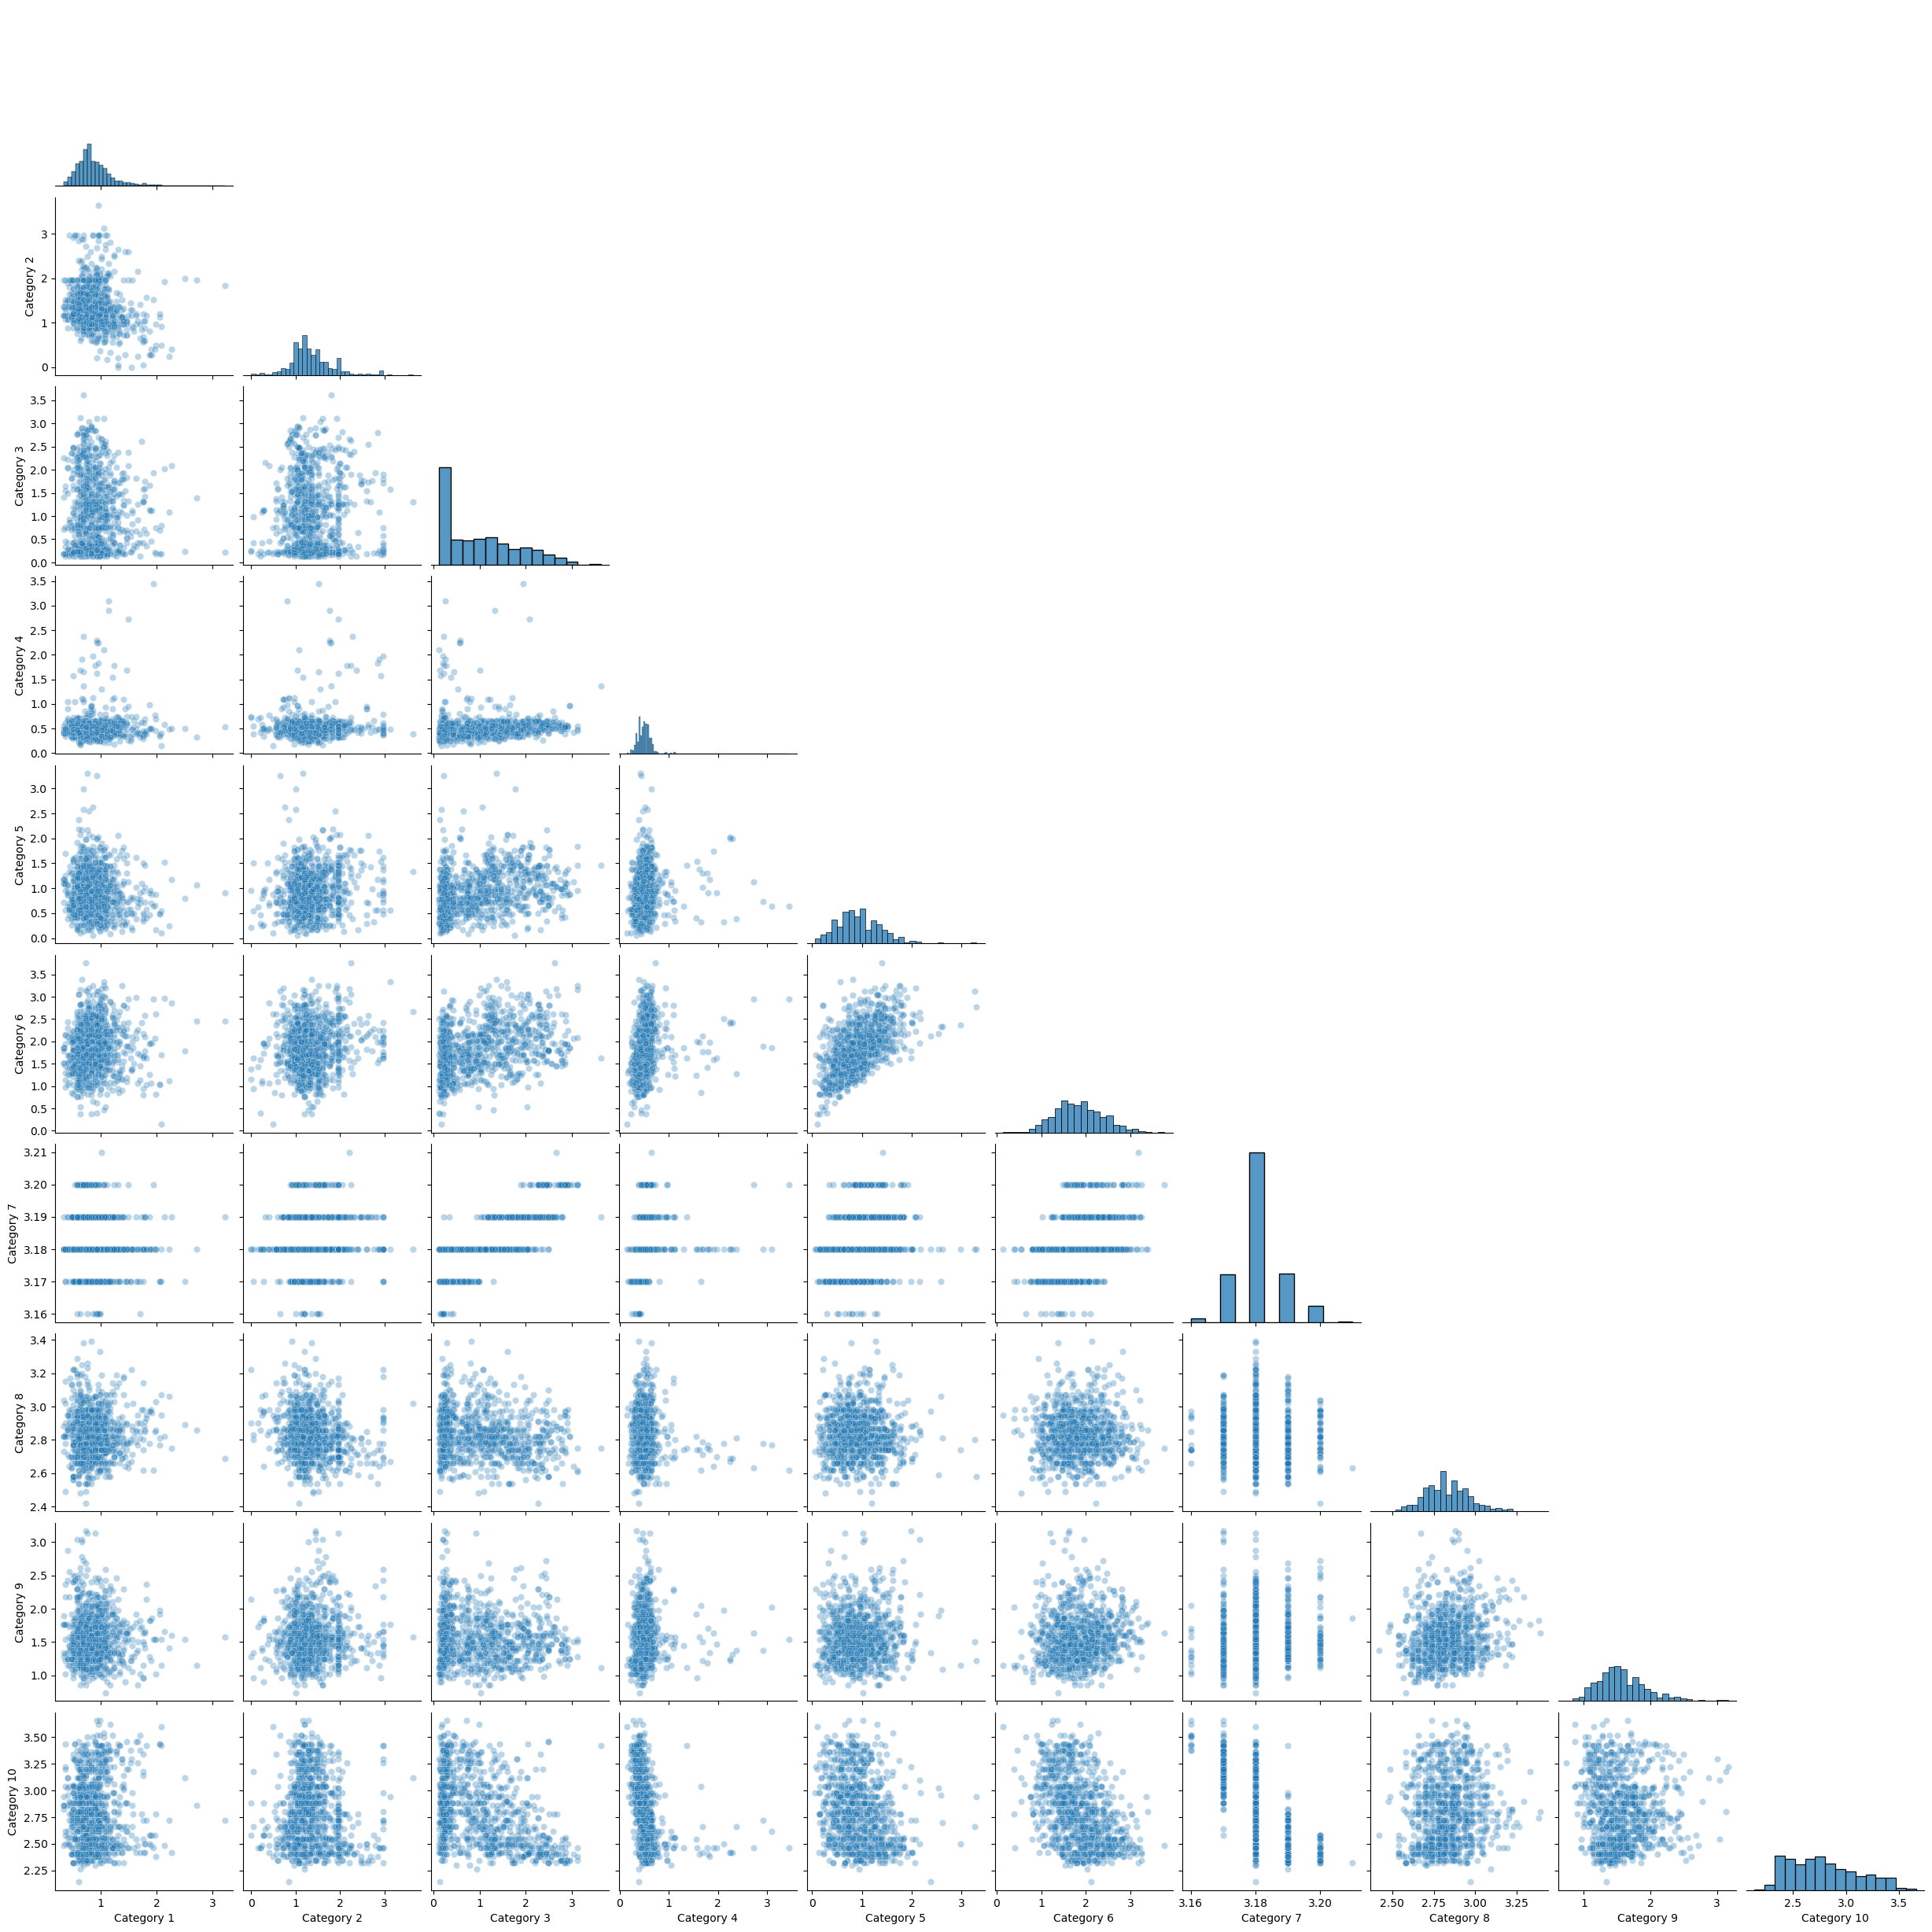

In [8]:
sns.pairplot(df, corner = True, plot_kws={'alpha':0.3})

# Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = df.drop('User ID', axis = 1).columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Model Development

In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [11]:
wcss = []
s_score = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=42)
    kmeans.fit(df[columns_to_scale])
    pred  = kmeans.labels_
    wcss.append(kmeans.inertia_)
    s_score.append(metrics.silhouette_score(df[columns_to_scale], kmeans.labels_))

# Model Evaluation

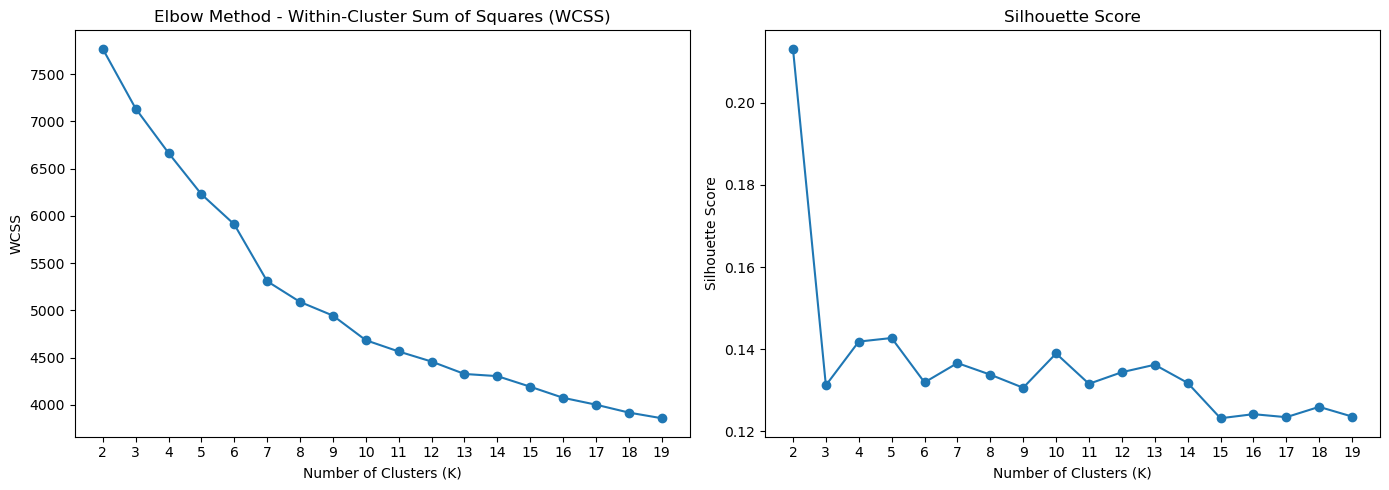

In [12]:
k_values = range(2,20)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method - Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)

plt.subplot(1, 2, 2)
plt.plot(k_values, s_score, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.xticks(k_values)

plt.tight_layout()
plt.show()

WCSS elbow method shows n_clusters = 7 is the best number of clusters

Silhouette Score shows that n_clusters = 2 is the best number of clusters

We will try both n_clusters in different columns of the dataframe

# Recommendation System

In [13]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state=42)
kmeans.fit(df[columns_to_scale])
df['Cluster2'] = kmeans.labels_

kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state=42)
kmeans.fit(df[columns_to_scale])
df['Cluster7'] = kmeans.labels_


In [14]:
def recommend(data_frame, cluster_column, user1, user2):
    user1_cluster = data_frame[data_frame['User ID'] == user1][cluster_column].values[0]
    user2_cluster = data_frame[data_frame['User ID'] == user2][cluster_column].values[0]
    if user1_cluster == user2_cluster:
        return "Yes"
    else:
        return "No"


- For User 8, is it better to suggest the destinations User 28 likes or the destinations User 29 likes?

In [15]:
recommend(df, 'Cluster2', 'User 8', 'User 28')

'No'

In [16]:
recommend(df, 'Cluster2', 'User 8', 'User 29')

'Yes'

In [17]:
recommend(df, 'Cluster7', 'User 8', 'User 28')

'No'

In [18]:
recommend(df, 'Cluster7', 'User 8', 'User 29')

'Yes'

### In both cases (n_clusters = 2 and n_clusters = 7) users 8 and 29 are in the same cluster, and user 28 in other cluster (see table below)

- For User 11, is it better to suggest the destinations User 16 likes or the destinations User 28 likes?

In [19]:
recommend(df, 'Cluster2', 'User 11', 'User 16')

'Yes'

In [20]:
recommend(df, 'Cluster2', 'User 11', 'User 28')

'Yes'

In [21]:
recommend(df, 'Cluster7', 'User 11', 'User 16')

'No'

In [22]:
recommend(df, 'Cluster7', 'User 11', 'User 28')

'Yes'

### In case of n_clusters = 2, users 11, 16, and 28  are in the same cluster

### In case of n_clusters = 7, users 11, and 28  are in the same cluster, and user 16 is in other cluster (see table below)

In [23]:
df[df['User ID'].isin(['User 8', 'User 11', 'User 16', 'User 28', 'User 29'])][['User ID', 'Cluster2', 'Cluster7']]

User ID  Cluster2  Cluster7
7    User 8         0         5
10  User 11         1         4
15  User 16         1         1
27  User 28         1         4
28  User 29         0         5

Choosing the number of clusters according to the elbow method or according to the Silhouette Score maybe mathematically justified, but in this case we need more domain knowledge.

when clustering travelers, in my opinion, n_clusters = 2 will do a better job than n_clusters = 7. Below are pairplots of features colored by the clusters. It is clear that n_clusters = 2 gives a clear visual representation. Classes are clearly visible.

In case n_clusters = 7, clusters are not visually separated .

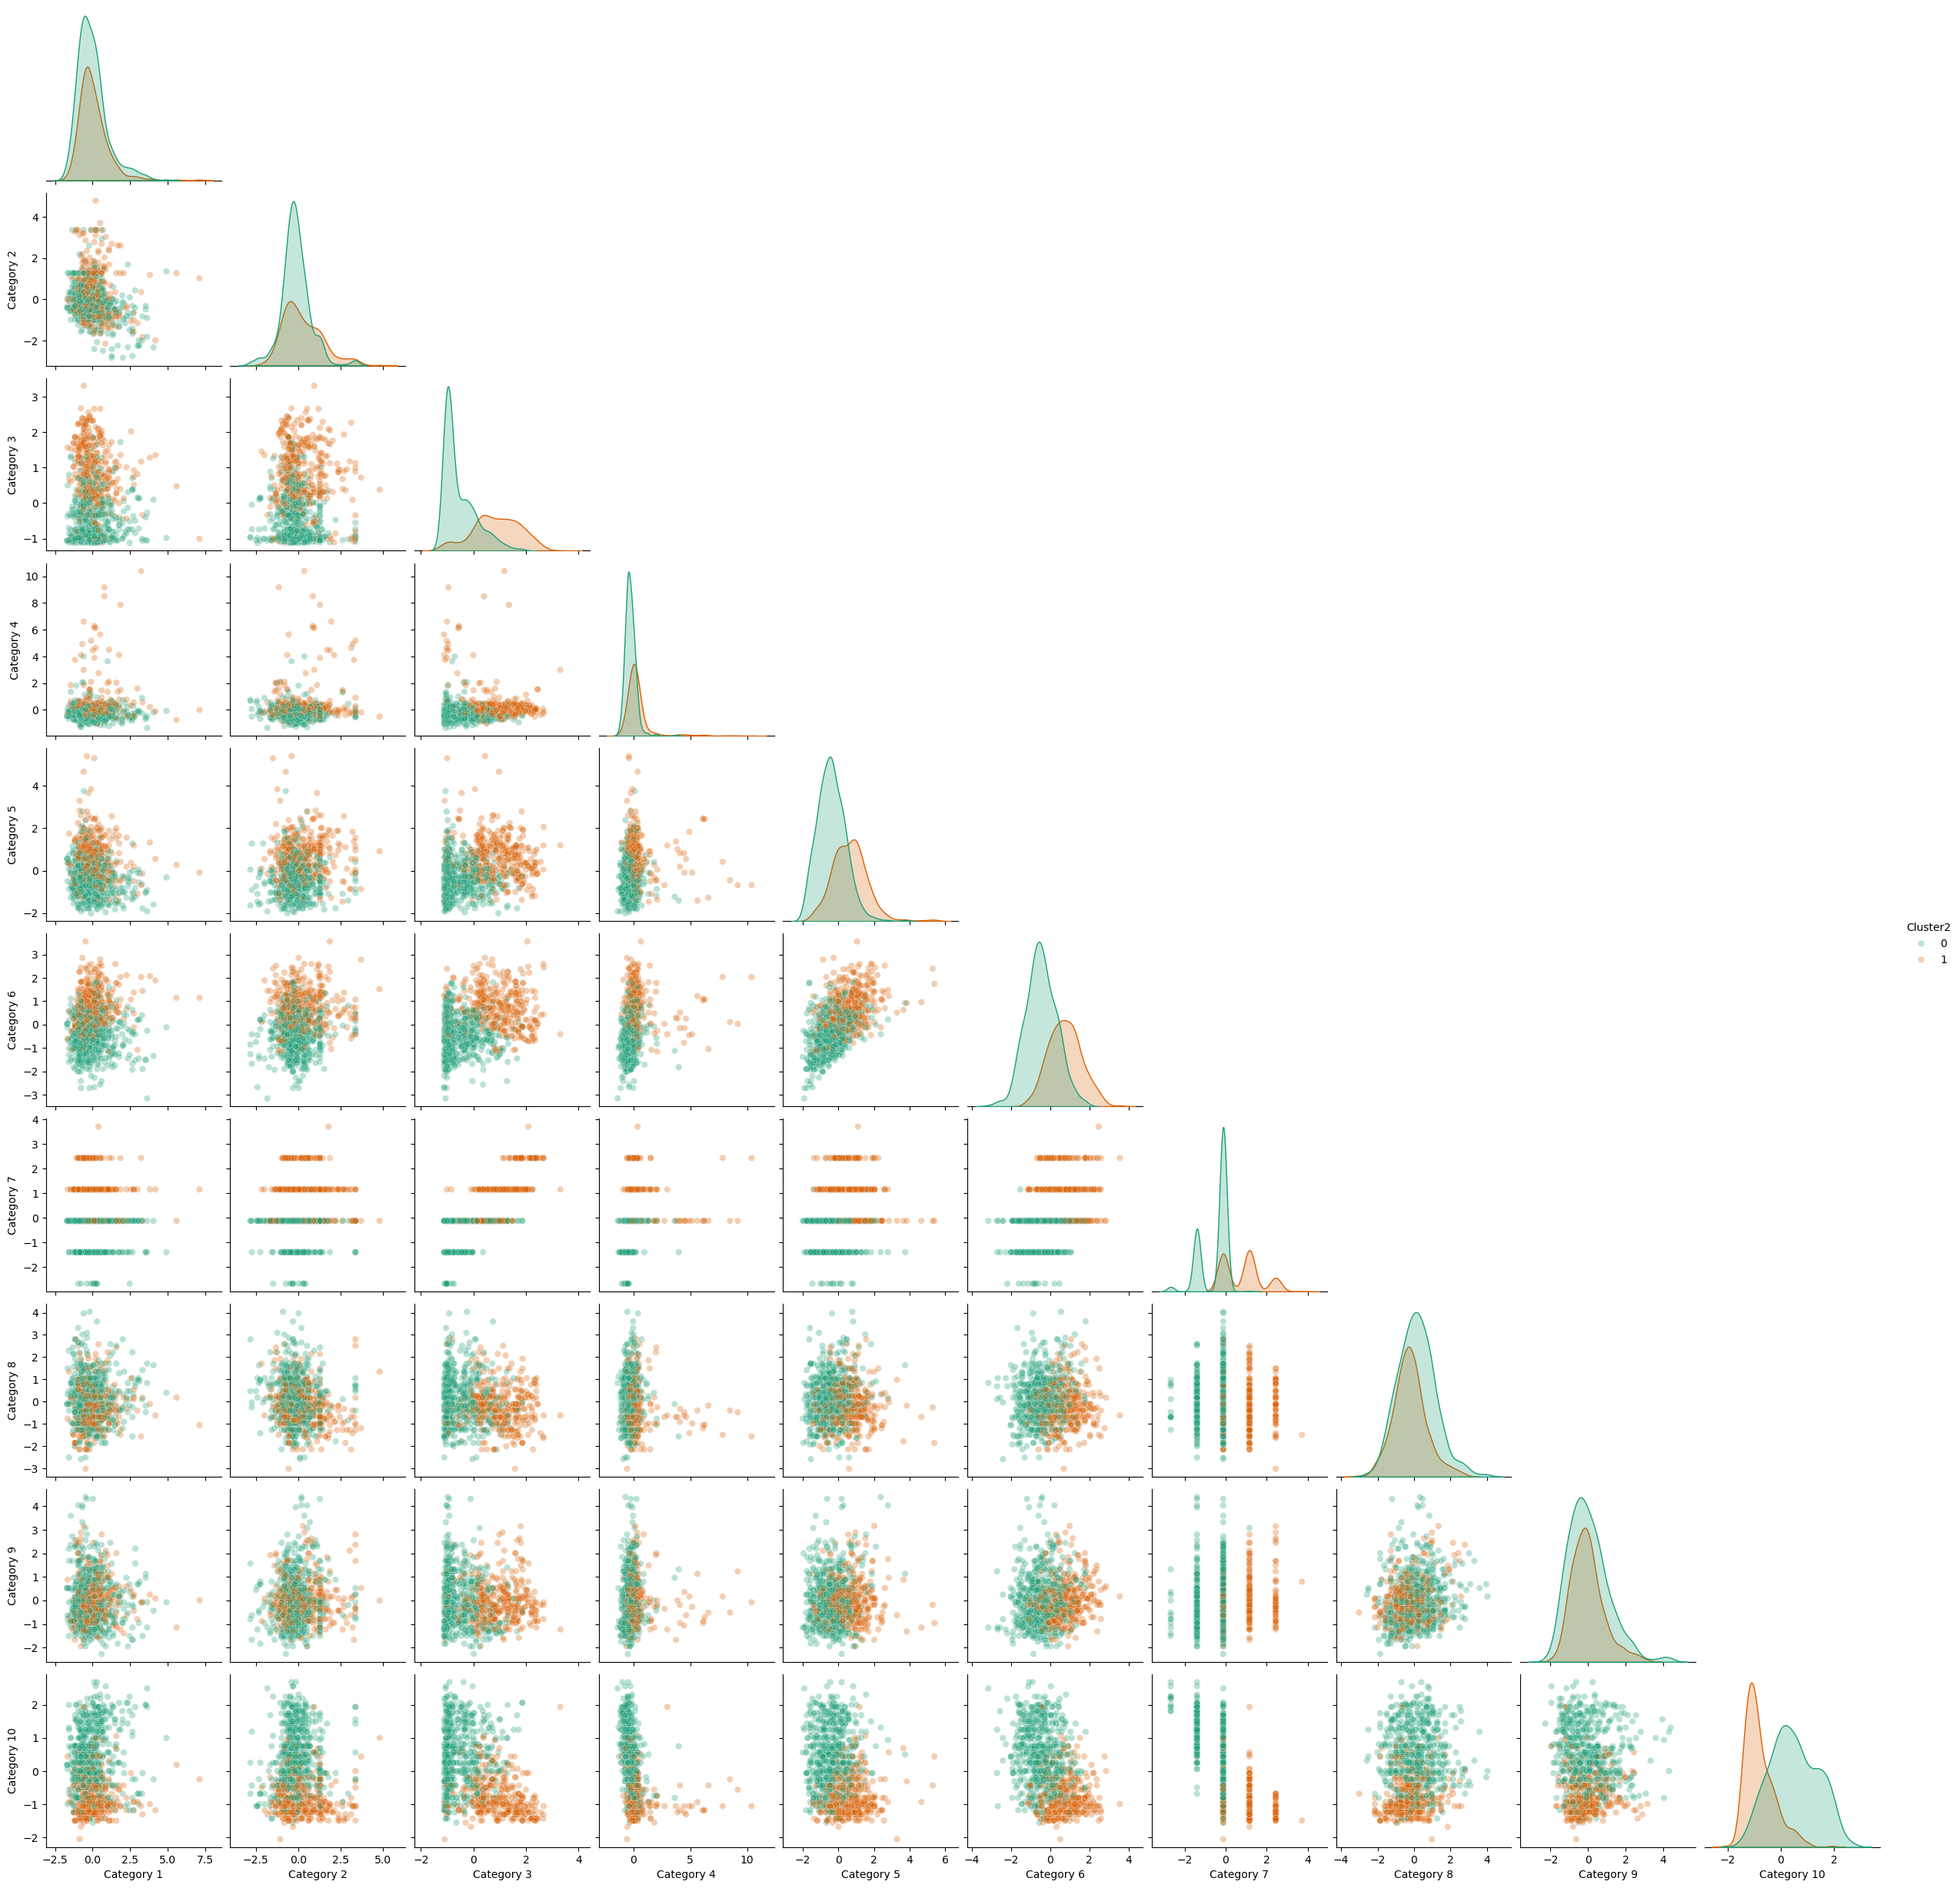

In [24]:
sns.pairplot(df.drop('Cluster7', axis = 1), corner = True, plot_kws={'alpha':0.3}, hue="Cluster2", palette='Dark2')

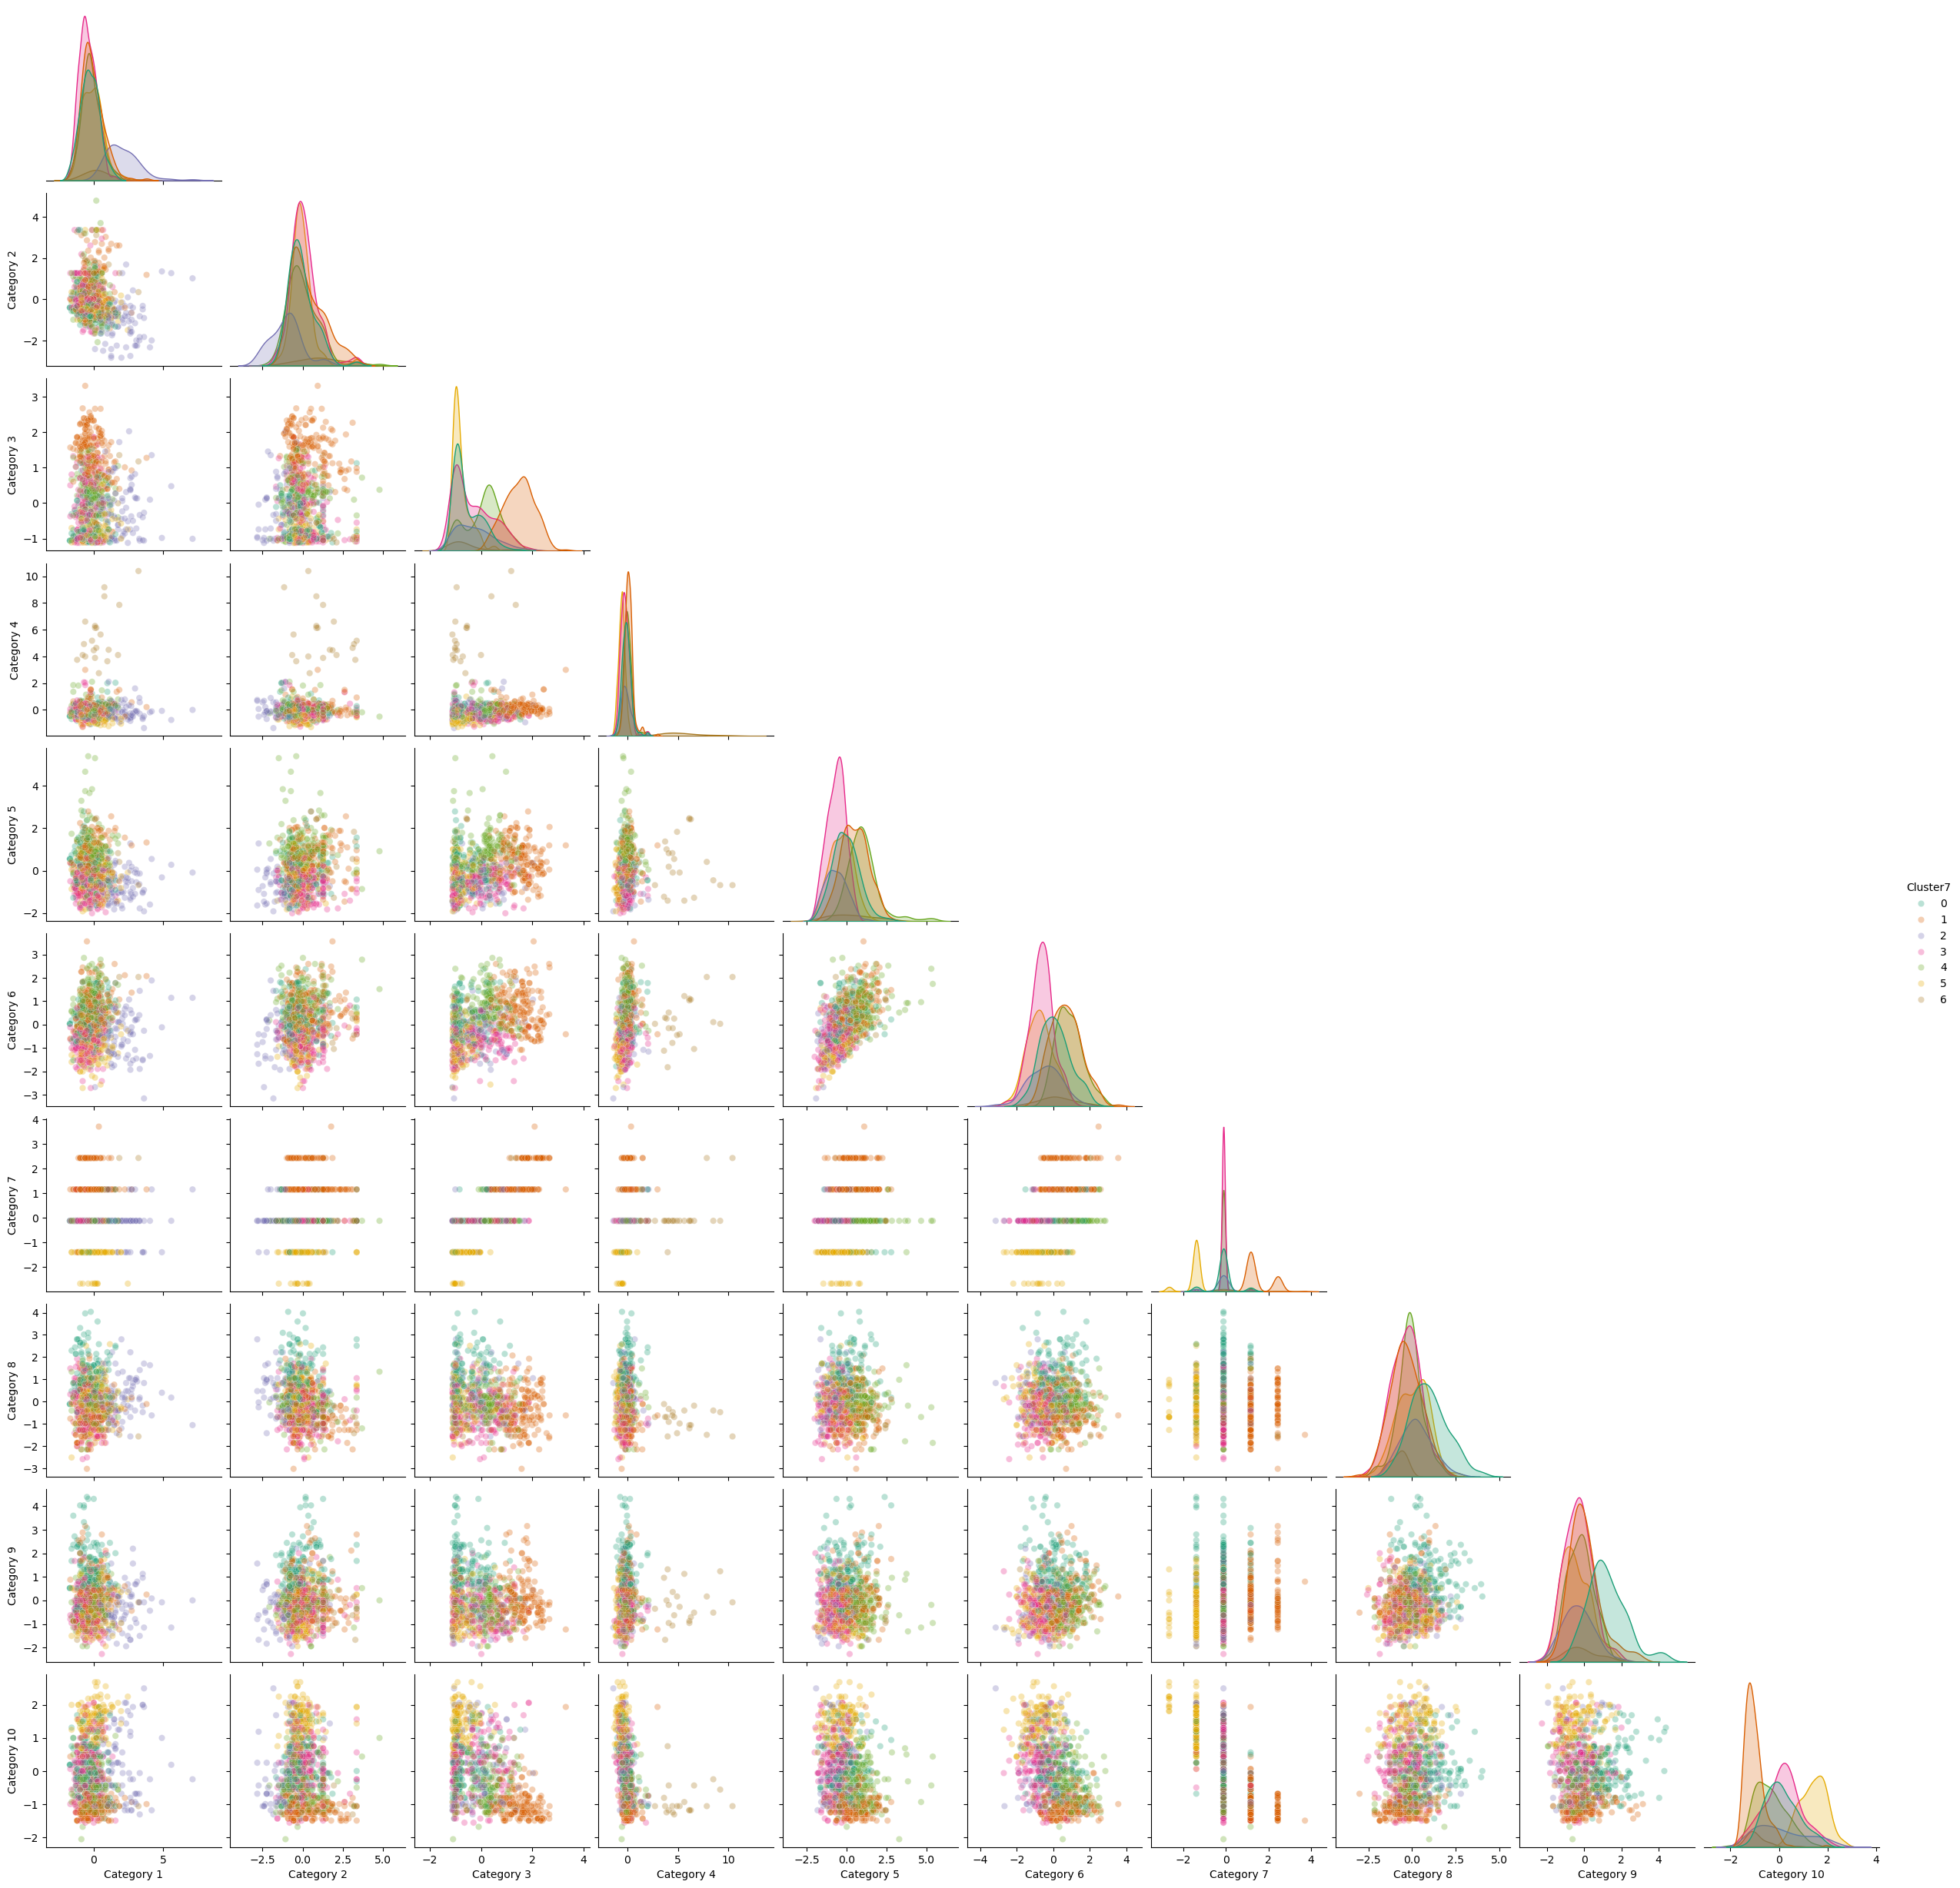

In [25]:
sns.pairplot(df.drop('Cluster2', axis = 1), corner = True, plot_kws={'alpha':0.3}, hue="Cluster7", palette='Dark2')

In [26]:
df.drop('Cluster7', axis = 1).corr(numeric_only=True)['Cluster2'].sort_values(ascending = False)[1:]

Category 3     0.682796
Category 7     0.655073
Category 6     0.592286
Category 5     0.501386
Category 4     0.331057
Category 2     0.198098
Category 1     0.040921
Category 9    -0.021672
Category 8    -0.176724
Category 10   -0.627968
Name: Cluster2, dtype: float64

<Axes: >

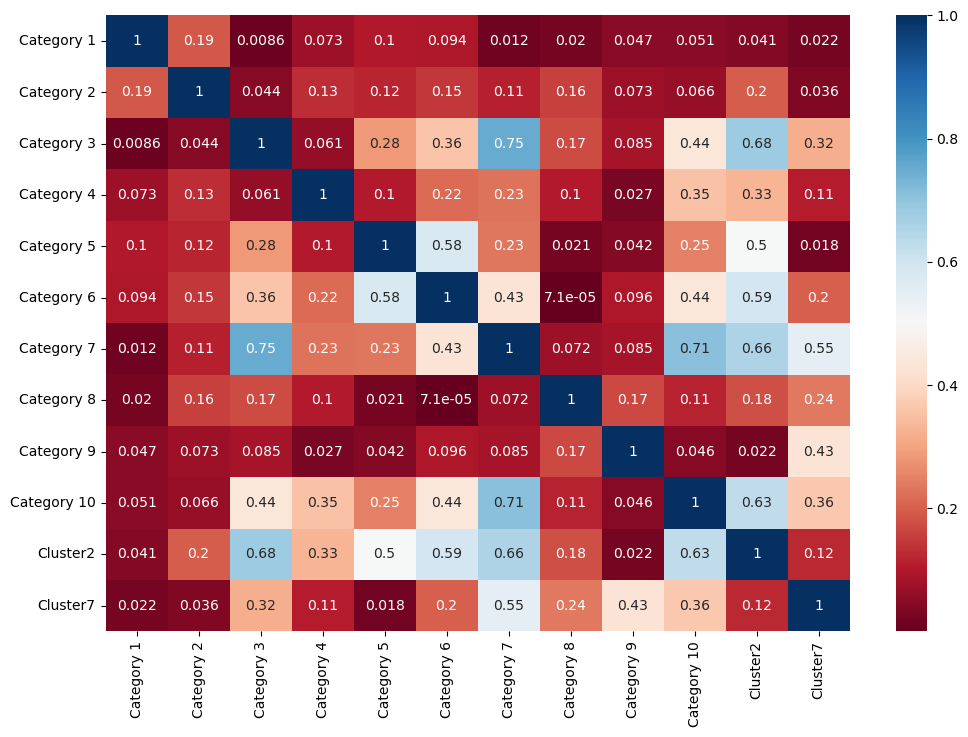

In [27]:
# Check the correlation between each pair of numberic fetures
corr = df.corr(numeric_only=True)

# I used absolute values to show both positive and negative correlations with same color
fig = plt.figure(figsize=(12, 8))
sns.heatmap(np.abs(corr), annot = True, cmap="RdBu")
#sns.heatmap(corr, annot = True, cmap="RdBu")

For n_cluster = 2, features "Category 3", "Category 6", "Category 7", and "Category 10" all have a strong correlation with the resulting clusters